In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

from pathlib import Path

In [2]:
fields = [
    "seq", "cam", "model", "purge", "idf1", "idp", "idr", "recall", "precision",
    "num_unique_objects", "mostly_tracked", "partially_tracked", "mostly_lost",
    "num_false_positives", "num_misses", "num_switches", "num_fragmentations",
    "mota", "motp", "num_transfer", "num_ascend", "num_migrate"
]

In [3]:
def test_results(seq):
    full_dataframe = pd.DataFrame(
        columns=fields
    )
    root_result_path = Path("./results")
    cam_re = re.compile("(c[0-9]+)")
    
    sequence_path = root_result_path / f"train_models_test{seq}"
    
    for model_path in sequence_path.glob("*"):
        model = model_path.parts[-1]
        for camera in model_path.glob("ai_cities*"):
            cam = cam_re.search(camera.parts[-1]).group(0)
    
            not_purging = pd.read_csv(camera / "summary.csv")
            purging = pd.read_csv(camera / "summary_purge.csv")
    
            not_purging[["seq", "cam", "model", "purge"]] = [seq, cam, model, False]
            purging[["seq", "cam", "model", "purge"]] = [seq, cam, model, True]
            full_dataframe = pd.concat([full_dataframe, purging, not_purging])
    return full_dataframe

In [4]:
test_s03 = test_results("S03")
test_s01 = test_results("S01")
test_s04 = test_results("S04")

In [5]:
test_s03

,seq,cam,model,purge,idf1,idp,idr,recall,precision,num_unique_objects,...,mostly_lost,num_false_positives,num_misses,num_switches,num_fragmentations,mota,motp,num_transfer,num_ascend,num_migrate


In [28]:
test_s01

,seq,cam,model,purge,idf1,idp,idr,recall,precision,num_unique_objects,...,num_false_positives,num_misses,num_switches,num_fragmentations,mota,motp,num_transfer,num_ascend,num_migrate,Unnamed: 0
0,S01,c003,faster_c4,True,0.718969,0.773208,0.67184,0.735757,0.846769,82,...,652,1294,28,18,0.596896,0.425868,37,11,20,acc
0,S01,c003,faster_c4,False,0.652939,0.532013,0.845007,0.99367,0.625611,82,...,2912,31,69,6,0.38493,0.284246,11,61,3,acc
0,S01,c001,faster_c4,True,0.700722,0.748265,0.658859,0.735574,0.835389,77,...,427,779,15,16,0.58554,0.312845,24,10,19,acc
0,S01,c001,faster_c4,False,0.627229,0.537864,0.752206,0.994569,0.711165,77,...,1190,16,229,10,0.512899,0.174534,5,227,4,acc
0,S01,c005,faster_c4,True,0.595813,0.56787,0.626648,0.772791,0.700305,94,...,1179,810,37,15,0.431697,0.634189,50,19,32,acc
0,S01,c005,faster_c4,False,0.553725,0.402677,0.886115,0.997756,0.45341,94,...,4288,8,286,1,-0.285273,0.50086,16,278,8,acc
0,S01,c002,faster_c4,True,0.688337,0.628723,0.760441,0.873566,0.722254,74,...,1464,551,18,7,0.533502,0.25014,21,13,16,acc
0,S01,c002,faster_c4,False,0.650951,0.520716,0.868059,0.997476,0.598348,74,...,2918,11,136,4,0.296696,0.161497,5,133,2,acc
0,S01,c004,faster_c4,True,0.810551,0.741952,0.893128,0.94147,0.782111,80,...,1313,293,24,16,0.674391,0.341075,32,10,18,acc
0,S01,c004,faster_c4,False,0.77214,0.668665,0.913504,0.985018,0.721012,80,...,1908,75,31,16,0.597683,0.205863,10,27,6,acc


In [30]:
test_s04

,seq,cam,model,purge,idf1,idp,idr,recall,precision,num_unique_objects,...,num_false_positives,num_misses,num_switches,num_fragmentations,mota,motp,num_transfer,num_ascend,num_migrate,Unnamed: 0
0,S04,c019,faster_c4,True,0.879056,0.986755,0.792553,0.803191,1.0,8,...,0,74,0,2,0.803191,0.113179,2,0,2,acc
0,S04,c019,faster_c4,False,0.87062,0.882514,0.859043,0.864362,0.887978,8,...,41,51,1,0,0.75266,0.093233,0,1,0,acc
0,S04,c021,faster_c4,True,0.989011,0.986842,0.991189,0.991189,0.986842,6,...,6,4,0,0,0.977974,0.111473,0,0,0,acc
0,S04,c021,faster_c4,False,0.374124,0.230106,1.0,1.0,0.230106,6,...,1519,0,2,0,-2.35022,0.20282,0,2,0,acc
0,S04,c038,faster_c4,True,0.806164,0.810767,0.801613,0.840323,0.849918,19,...,92,99,5,4,0.683871,0.341,9,1,5,acc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,S04,c034,faster_fpn,False,0.526094,0.447333,0.638516,0.988484,0.692515,20,...,686,18,69,11,0.505438,0.39893,16,54,2,acc
0,S04,c022,faster_fpn,True,0.882456,0.849662,0.917883,0.919708,0.851351,7,...,88,44,1,1,0.757299,0.195183,1,1,1,acc
0,S04,c022,faster_fpn,False,0.347716,0.210445,1.0,1.0,0.210445,7,...,2056,0,0,0,-2.751825,0.12208,0,0,0,acc
0,S04,c027,faster_fpn,True,0.787136,0.866779,0.720898,0.817672,0.983137,7,...,10,130,3,1,0.799439,0.143465,2,2,1,acc


In [43]:
test_s03.to_csv("./results/s03summary.csv")

In [38]:
print(test_s03[np.logical_and(test_s03["model"] == "faster_fpn", test_s03["purge"] == True)]["idf1"].mean())
print(test_s03[np.logical_and(test_s03["model"] == "faster_fpn", test_s03["purge"] == False)]["idf1"].mean())

0.7679431363097894
0.48843730059551566


In [39]:
print(test_s03[np.logical_and(test_s03["model"] == "faster_dc5", test_s03["purge"] == True)]["idf1"].mean())
print(test_s03[np.logical_and(test_s03["model"] == "faster_dc5", test_s03["purge"] == False)]["idf1"].mean())

0.7545692723522452
0.49819543885704537


In [40]:
print(test_s03[np.logical_and(test_s03["model"] == "faster_c4", test_s03["purge"] == True)]["idf1"].mean())
print(test_s03[np.logical_and(test_s03["model"] == "faster_c4", test_s03["purge"] == False)]["idf1"].mean())

0.7718861783508012
0.5653766249183798


In [41]:
print(test_s03[np.logical_and(test_s03["model"] == "retina_fpn", test_s03["purge"] == True)]["idf1"].mean())
print(test_s03[np.logical_and(test_s03["model"] == "retina_fpn", test_s03["purge"] == False)]["idf1"].mean())

0.5156940984530545
0.1388549586206453


Text(0.5, 1.0, 'Mean IDF1 (S03)')

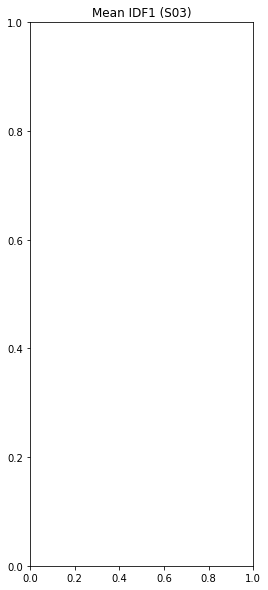

In [42]:
plt.figure(figsize=(4, 10))
plt.title("Mean IDF1 (S03)")
